# Stroke Prediction Project
## 1. Problem Definition: 
- Goal: predict whether a patient is likely to get stroke
## 2. Data cleansing/preprocessing & Feature Engineering
- Overview data
- Visualization data
- Data preprocessing
## 3. Training module

#### Questions to ask:
1) Male/Female who has more strokes.

2) People of which age group are more likely to get a stroke.

3) Is hypertension a cause? 

4) A person with heart disease is more likely to get a stroke (need confirmation).

5) Marriage may be a cause of strokes.

6) People working in private jobs may be the majority of people with strokes(mostly cause of stress).

7) People living in urban areas have more chances of getting stroke? (need to confirm)

8) Glucose levels are important and must be observed closely with other things.

9) BMI must be closely observed with age and gender.

10) People who smoke are more likely to get a stroke (need confirmation).



In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mydef

In [167]:
path ='./data/healthcare-dataset-stroke-data.csv'
raw_df = pd.read_csv(path)

In [168]:
df = raw_df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [169]:
move_df = df['age']
df = df.drop(['age'],axis =1)
new_index = 9
df.insert(new_index, 'age', move_df)

In [170]:
id_df = df['id'] 
df = df.drop(['id'], axis= 1)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   age                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [172]:
df.describe()

,hypertension,heart_disease,avg_glucose_level,bmi,age,stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,28.893237,43.226614,0.048728
std,0.296607,0.226063,45.283560,7.854067,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,97.600000,82.000000,1.000000


## Observations : 
1) BMI contains missing values.

2) The average age is 43.

3) The average bmi is 29 (will change after imputation).

4) The minimum age is questionable.

5) Average glucose level is 106 (can be useful later).

In [173]:
mydef.draw_missing_data_table(df)

,Total,Percent
gender,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,0.039335
age,0,0.000000
smoking_status,0,0.000000


In [174]:
# Replace missing values with SimpleImputer
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan, strategy= 'mean')

In [175]:
bmi_index = 7
filled_bmi = impute.fit_transform(df.iloc[:, bmi_index : 8].values)
filled_bmi

array([[36.6       ],
       [28.89323691],
       [32.5       ],
       ...,
       [30.6       ],
       [25.6       ],
       [26.2       ]])

In [176]:
df['bmi'] = pd.DataFrame(filled_bmi)
df['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

# Visualization data

In [177]:
df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,age,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.600000,67.0,formerly smoked,1
1,Female,0,0,Yes,Self-employed,Rural,202.21,28.893237,61.0,never smoked,1
2,Male,0,1,Yes,Private,Rural,105.92,32.500000,80.0,never smoked,1
3,Female,0,0,Yes,Private,Urban,171.23,34.400000,49.0,smokes,1
4,Female,1,0,Yes,Self-employed,Rural,174.12,24.000000,79.0,never smoked,1


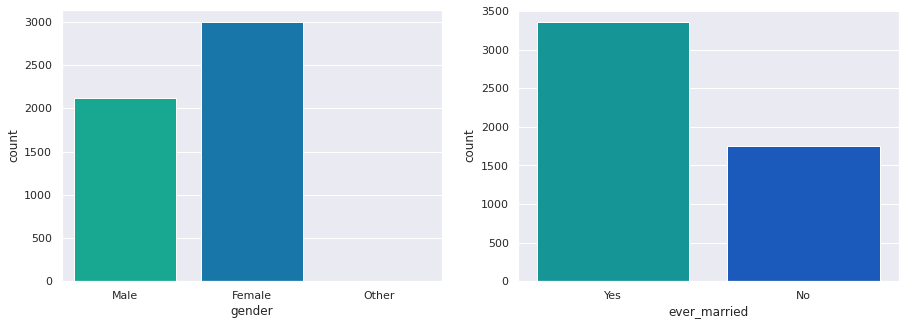

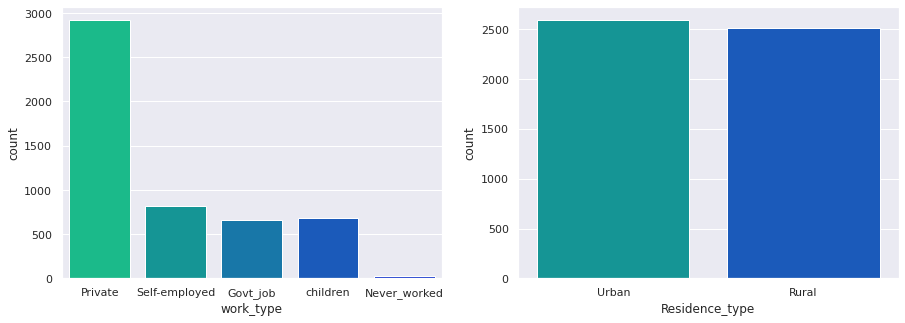

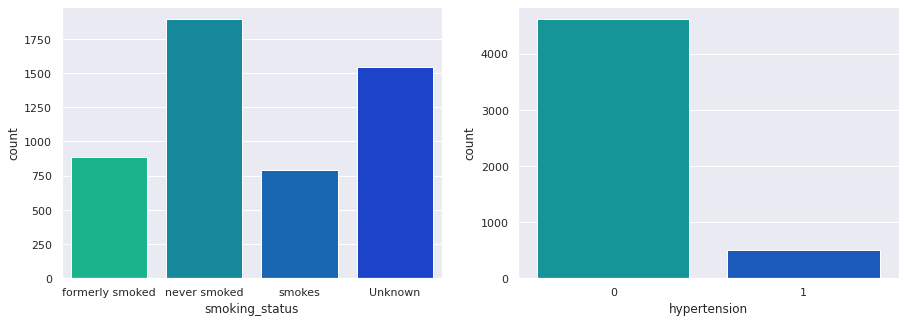

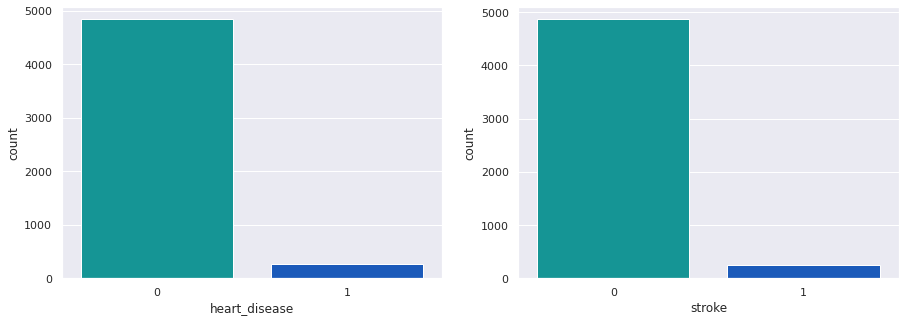

In [178]:
list_categorical_column = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease', 'stroke']
index = 0
while index < len(list_categorical_column):
    row_of_chart =1
    col_of_chart = 2
    fig, (ax1,ax2) = plt.subplots(row_of_chart, col_of_chart, figsize = (15,5) )
    sns.countplot(data = df, x = list_categorical_column[index], palette='winter_r', ax = ax1);
    index +=1
    if index == len(list_categorical_column):
        break
    sns.countplot(data = df, x = list_categorical_column[index], palette='winter_r', ax = ax2);
    index += 1

### Observations :
1) Females are more than male in our data. The Other category in gender is not visible as it contains only one value.

2) The number of people who are married are way more than unmarried people(makes sense as the distribution is between 0 and 60)

3) People seem to prefer working in private companies while the number of self-emplyed/ govt_job and children seems to be equal in number (children can be ignored). Unemployed people are extremely less.

4) Not a big difference between the population in urban and rural area.

5) The Unknown category reprsents that we do not know if a person smoked or not. If the size of unknown is too large then we will remove it from our model. Non-smokers are way more than people who smoked/used to smoke which is a good thing.
6) The number of people without hypertension are way less than people who has it.

7) The number of people with heart disease is extremely low.
8) Number of people with strokes are less than 1000 in number.

In [179]:
# Drop other in gender column
list_other_index = list(df[df['gender'] == 'Other'].index)
df = df.drop([index for index in list_other_index], axis = 0)

In [180]:
# Drop Never_worked in work_type column
list_Never_worked_index = list(df[df['work_type'] == 'Never_worked'].index)
df = df.drop([index for index in list_Never_worked_index], axis= 0)

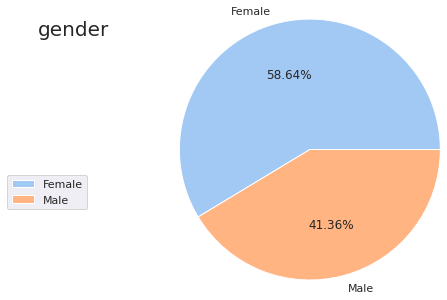

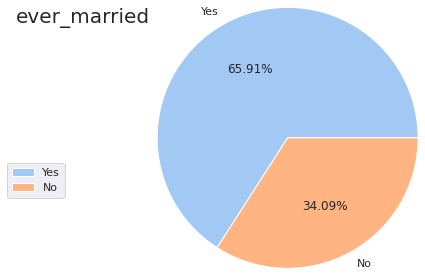

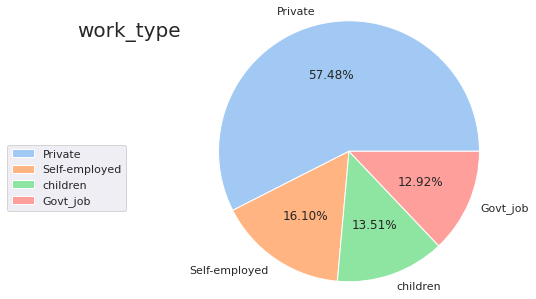

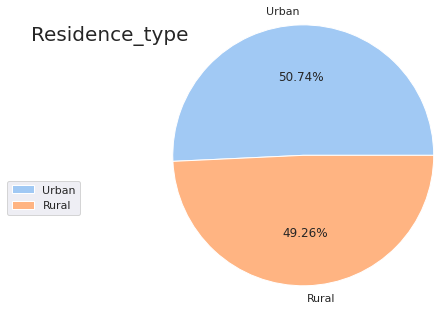

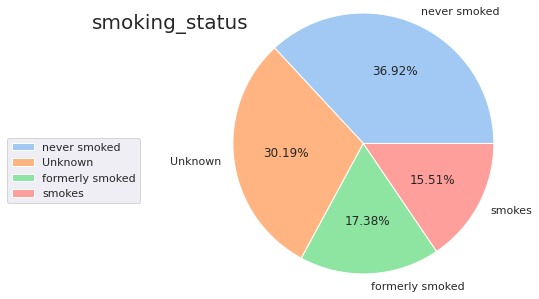

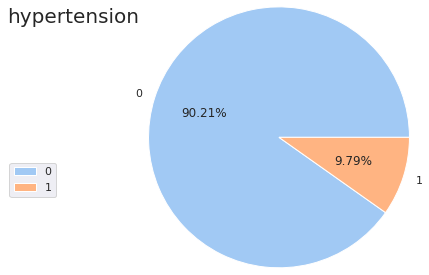

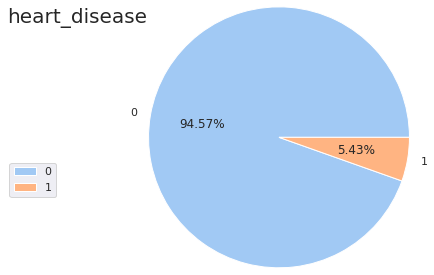

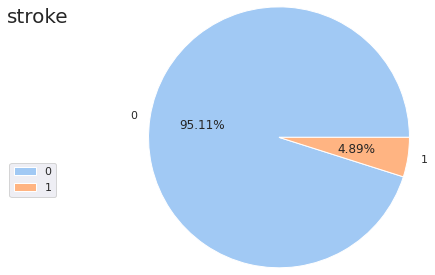

In [181]:
for col in list_categorical_column:
    data = df[col].value_counts()
    labels = list(data.index)
    name = df[col].name
    plt.figure()
    mydef.draw_pie(list(data.values),labels, name)

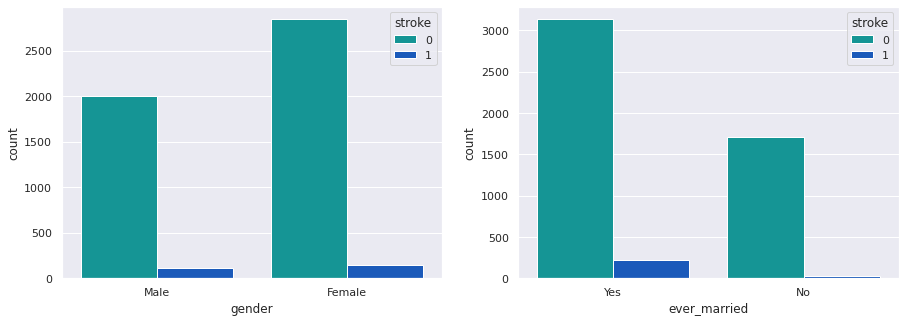

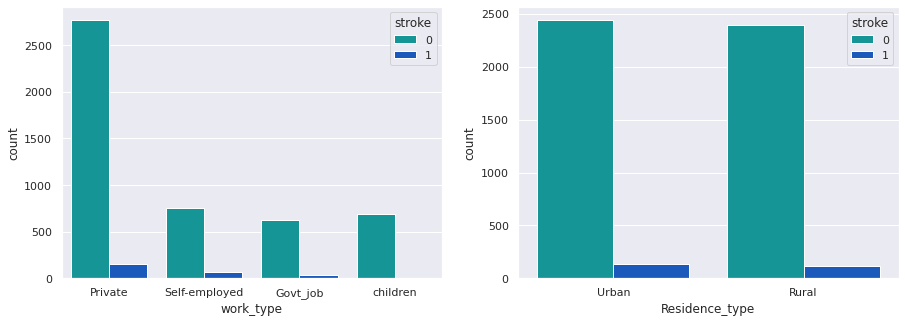

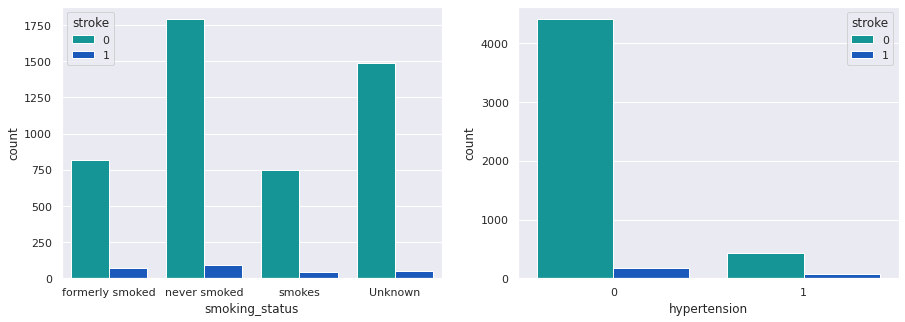

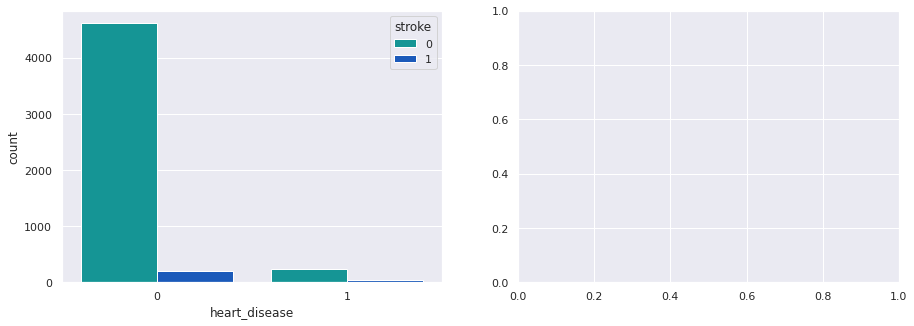

In [137]:
index = 0
while index < len(list_categorical_column):
    fig, (ax1, ax2) = plt.subplots(row_of_chart, col_of_chart, figsize=(15,5))
    sns.countplot(data = df, x = list_categorical_column[index], hue ='stroke', palette='winter_r',ax =ax1)
    index +=1
    if index == len(list_categorical_column) -1 :
        break
    sns.countplot(data = df, x = list_categorical_column[index], hue ='stroke', palette='winter_r',ax =ax2)
    index +=1

## Observations :
1) Seems that number of male and female who has stroke are equal in number.

2) The number of people who do not have hypertension also shows signs of no stroke. And people with hypertension also do not show signs of more people with stroke (may be due to the fact that our data has so many negative(0) variables).

3) The people with heart diesease show signs of stroke too(as expected).

4) The people who got married show signs of stroke way more than people who are unmarried ( expected i guess).

5) Private employees seems to experience stroke more than other work_types(may be due to work pressure). Self-employed people do show signs of stroke(may be due to reasons like heart disease,tension etc). Children can be ignored.

6) Almost no difference between people living in urban and rural areas in terms of stroke occurence.

7) People who formerly smoked and who smoke (combined) are showing signs of stroke way more than people who never smoked (considering the sample size of people who never smoked and people who used to smoke and smoke now).


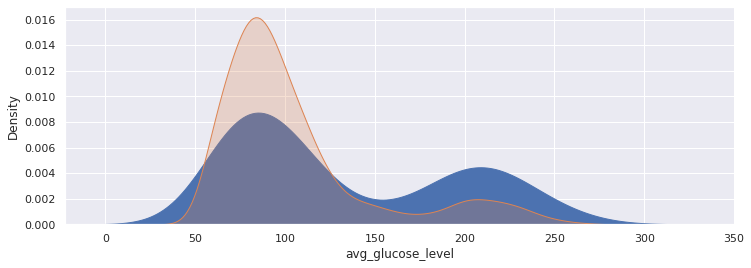

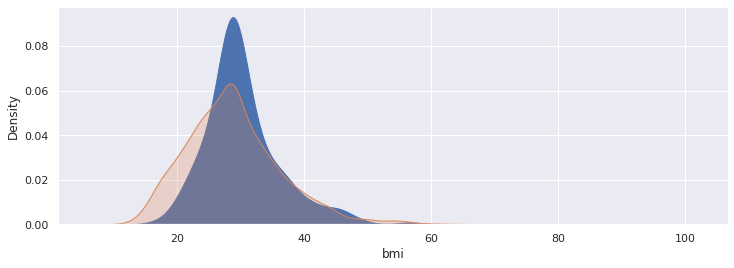

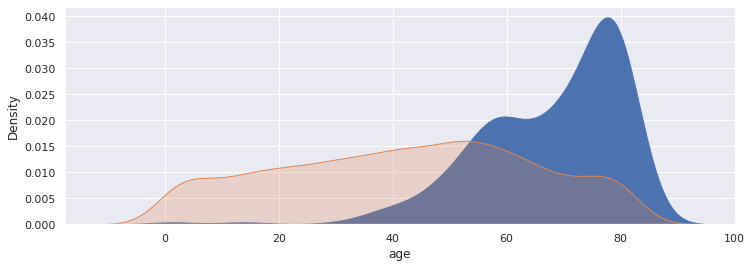

In [138]:
list_numerical_column = ['avg_glucose_level', 'bmi', 'age']
numerical_df = df[list_numerical_column]
for col in list_numerical_column:
    plt.figure(figsize=(12,4));
    sns.kdeplot(data = df[df['stroke'] ==1], x = col, shade= True, palette='winter_r', alpha = 1);
    sns.kdeplot(data = df[df['stroke'] ==0], x = col, shade= True, palette='winter_r' );

### Observations :
1) The avg_glucose_level is heavily skewed towards right and most of the distribution is between 50-150.

2) The bmi is between 0 and 50 for most of the people.

3) The age is distributed between 0 and 100 almost evenly.

4) The data is not normally distributed (have to normalize or standardize).

## Find correlation between numerical features

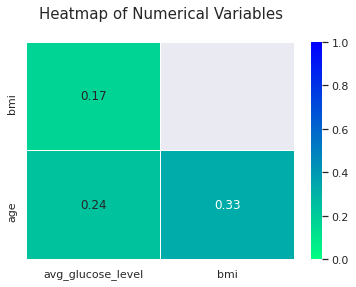

In [139]:
first_row =1
last_column = -1
numerical_corr = df[list_numerical_column].corr()
ones_corr = np.ones_like(numerical_corr, dtype=bool)
# remvove first row and last column 
numerical_corr = numerical_corr.iloc[first_row:, :last_column]
mask = np.triu(ones_corr)[first_row:, :last_column]

sns.heatmap(
    data =numerical_corr ,
    mask = mask,
    # Show number 
    annot = True,
    # Round number
    fmt = ".2f",
    # Set color
    cmap ='winter_r',
    # Set limitation of color bar (right)
    vmin = 0, vmax =1,
    # Color of the lines that will divide each cell.
    linecolor = 'white',
    # Width of the lines that will divide each cell.  
    linewidths = 0.5);
plt.title("Heatmap of Numerical Variables\n", fontsize = 15);

### As there is no strong correlation between the variables.

## Find correlation between features

In [140]:
# Drop irrelevant fields 
field = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_new = df.drop(field, axis =1)
df_new.head()

,hypertension,heart_disease,avg_glucose_level,bmi,age,stroke
0,0,1,228.69,36.600000,67.0,1
1,0,0,202.21,28.893237,61.0,1
2,0,1,105.92,32.500000,80.0,1
3,0,0,171.23,34.400000,49.0,1
4,1,0,174.12,24.000000,79.0,1


In [141]:
# Get correlation data only get number return matrix
df_new_corr = df_new.corr()
df_new_corr

,hypertension,heart_disease,avg_glucose_level,bmi,age,stroke
hypertension,1.000000,0.107991,0.174427,0.159939,0.275591,0.127613
heart_disease,0.107991,1.000000,0.161848,0.038507,0.263395,0.134702
avg_glucose_level,0.174427,0.161848,1.000000,0.169105,0.238153,0.131911
bmi,0.159939,0.038507,0.169105,1.000000,0.325364,0.038580
age,0.275591,0.263395,0.238153,0.325364,1.000000,0.244859
stroke,0.127613,0.134702,0.131911,0.038580,0.244859,1.000000


In [142]:
# ones_like can build a matrix of booleans with the same shape of our data
ones_corr = np.ones_like(df_new_corr, dtype= bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [143]:
# np.triu: retun only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

In [144]:
# remove first row and last column 
adjusted_mask = mask[first_row:, : last_column]
adjusted_mask

array([[False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

In [145]:
# cereal_corr is DataFrame, mask is a np matrix
adjusted_df_new_corr = df_new_corr.iloc[first_row: , : last_column]
adjusted_df_new_corr

,hypertension,heart_disease,avg_glucose_level,bmi,age
heart_disease,0.107991,1.000000,0.161848,0.038507,0.263395
avg_glucose_level,0.174427,0.161848,1.000000,0.169105,0.238153
bmi,0.159939,0.038507,0.169105,1.000000,0.325364
age,0.275591,0.263395,0.238153,0.325364,1.000000
stroke,0.127613,0.134702,0.131911,0.038580,0.244859


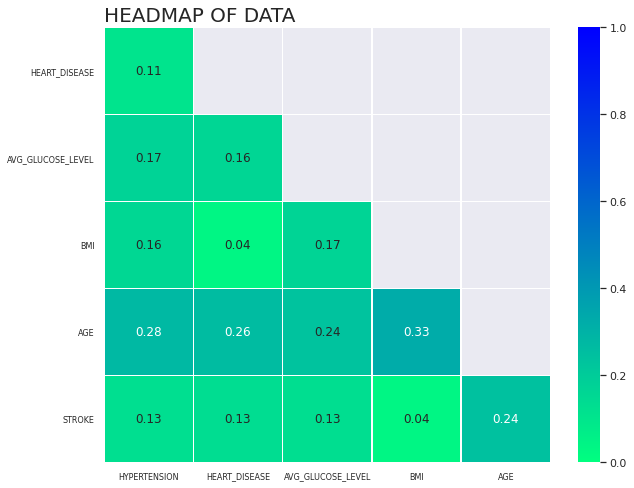

In [146]:
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(    
    data = adjusted_df_new_corr,
    mask = adjusted_mask,
    # Show number 
    annot = True,
    # Round number
    fmt = ".2f",
    # Set color
    cmap ='winter_r',
    # Set limitation of color bar (right)
    vmin = 0, vmax =1,
    # Color of the lines that will divide each cell.
    linecolor = 'white',
    # Width of the lines that will divide each cell.  
    linewidths = 0.5,
    );

yticks = [i.upper () for i in adjusted_df_new_corr.index]
xticks = [i.upper () for i in adjusted_df_new_corr.columns]

ax.set_yticklabels(yticks, rotation = 0, fontsize =8);
ax.set_xticklabels(xticks, rotation = 0, fontsize =8);

title = 'HEADMAP OF DATA'
ax.set_title(title, loc ='left', fontsize = 20);

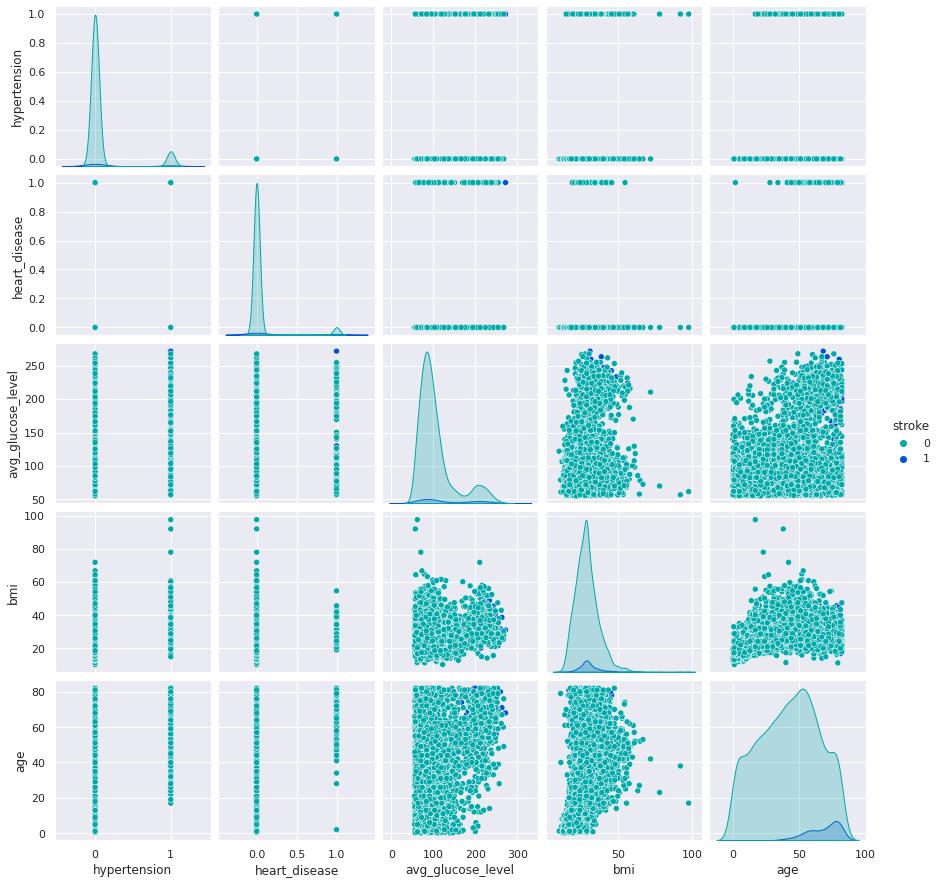

In [147]:
sns.pairplot(data = df_new, hue ='stroke', palette='winter_r');

### Observations:
1) No strong correlation between our features.

2) The highest correlation can be observed between body mass index(bmi) and age.

3) The weakest correlation can be observed between heart_disease and hyper_tension (questionable).

# Data Preprocessing
### x: data[feature]
### y: target variable Stroke

In [148]:
# x: Get all row and column expected last col
x = df.iloc[ : , 0:-1].values
# y get all row and last col
y =df.iloc[:, -1].values

In [149]:
print(x[0])
print(y)

['Male' 0 1 'Yes' 'Private' 'Urban' 228.69 36.6 67.0 'formerly smoked']
[1 1 1 ... 0 0 0]


##  1.Encode Categorical Data

### 1.1: Encode  Independent variable (X)

In [150]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


list_object_type_name = list(df.select_dtypes(include=['object']).columns)
list_object_type_index =[]
for col in list_object_type_name:
    # get index of col 
    object_type_index = df.columns.get_loc(col)
    list_object_type_index.append(object_type_index)


transformer = ColumnTransformer(
    transformers= [('encoder', OneHotEncoder(), list_object_type_index)], remainder = "passthrough")

# col_index for col_index in list_object_type_index
x = (transformer.fit_transform(x))

In [151]:
x[0]

array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
       0.0, 0, 1, 228.69, 36.6, 67.0], dtype=object)

### 1.2: Encode Dependent Variable (y)

In [152]:
# y already in bool type
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

## 2.Using SMOTE to balance the Data

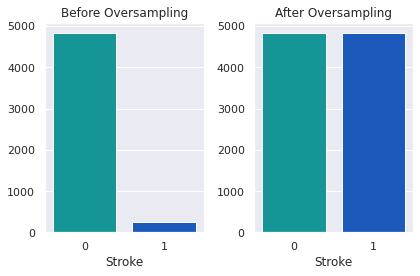

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1, palette='winter_r' );
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x, y = sm.fit_resample(x, y)
sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2, palette='winter_r' );
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

In [154]:
print(x[0])
x.shape

[  0.     1.     0.     1.     0.     1.     0.     0.     0.     1.
   0.     1.     0.     0.     0.     1.   228.69  36.6   67.  ]


(9676, 19)

## 3.Splitting the dataset (x =data, y = output) into the Training set and Test set

In [155]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# 80 % train and 20 % test
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2 )

In [156]:
print(x_train[0])
x_train.shape

[ 1.    0.    1.    0.    0.    1.    0.    0.    0.    1.    0.    0.
  0.    1.    0.    0.   78.04 32.4  40.  ]


(7740, 19)

## 4.Feature Scaling by StandardScaler

In [157]:
from sklearn.preprocessing import StandardScaler
column_scaling_index = 16
x_train[: , column_scaling_index:] = StandardScaler().fit_transform(x_train[: , column_scaling_index:])
x_train

array([[ 1.        ,  0.        ,  1.        , ..., -0.72725325,
         0.45838828, -0.67773967],
       [ 1.        ,  0.        ,  0.        , ..., -0.37354066,
         1.31372449,  0.09083618],
       [ 0.        ,  1.        ,  0.        , ..., -0.74819756,
        -0.28974792,  0.25449399],
       ...,
       [ 0.89995714,  0.10004286,  0.89995714, ..., -0.64768074,
        -0.80322346, -0.75006847],
       [ 1.        ,  0.        ,  0.        , ...,  0.13810872,
        -0.76352059, -1.08463277],
       [ 1.        ,  0.        ,  0.        , ..., -1.01542415,
         0.12741066, -0.12027556]])

In [158]:
x_test[: , column_scaling_index:] = StandardScaler().fit_transform(x_test[: , column_scaling_index:])
x_test

array([[ 0.03930803,  0.96069197,  0.        , ...,  2.14126847,
        -0.32792558,  1.11087901],
       [ 0.        ,  1.        ,  0.        , ..., -0.61492618,
         0.45553549, -1.02839243],
       [ 1.        ,  0.        ,  0.        , ...,  0.91549118,
        -0.30671711,  1.06887065],
       ...,
       [ 0.2762949 ,  0.7237051 ,  0.        , ..., -0.83480045,
        -0.35605108,  1.14745898],
       [ 0.        ,  1.        ,  0.        , ..., -0.7345736 ,
        -0.22707503,  0.19759448],
       [ 0.        ,  1.        ,  0.11131937, ...,  1.67060105,
        -1.22227133,  0.18738377]])

# Train Module

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
dt_model = DecisionTreeClassifier(random_state =1)

In [160]:
# Train Module
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [161]:
dt_model.score(x_test, y_test) #Return R^2 of the regression

0.9199380165289256

In [162]:
#Prediction
y_preds = dt_model.predict(x_test)
y_preds

array([1, 0, 1, ..., 1, 1, 1])

In [163]:
print(f"Accuracy Score : {round(accuracy_score(y_test, y_preds) * 100, 2)}%")

Accuracy Score : 91.99%


In [164]:
# Import ML Libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    [XGBClassifier(random_state =1),'XGB Classifier'], [RandomForestClassifier(random_state =1),'Random Forest'], 
    [LGBMClassifier(random_state =1),'LGBM Classifier'], [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
    [SGDClassifier(random_state =1),'SGD Classifier'], [SVC(random_state =1),'SVC'],
    [GaussianNB(),'GaussianNB'],[DecisionTreeClassifier(random_state =1),'Decision Tree Classifier']
];

In [165]:
for cls in classifiers:
    model = cls[0]
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    score_ = round(model.score(x_test,y_test), 2)*100
    accuracy =  round(accuracy_score(y_test, y_pred), 2) *  100
    recall = round(recall_score(y_test, y_pred), 2) *  100
    precision = round(precision_score(y_test, y_pred), 2) *  100

    print(f"{cls[1]}")
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(f"Score : {round(model.score(x_test,y_test), 2)*100}")
    print("Accuracy : ", round(accuracy_score(y_test, y_pred), 2) *  100)
    print("Recall : ", round(recall_score(y_test, y_pred), 2) *  100)
    print("Precision : ", round(precision_score(y_test, y_pred), 2) *  100)
    print("---------------------------------")

/home/lee/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:12:30] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier
Confusion Matrix:
[[936  26]
 [ 51 923]]
Score : 96.0
Accuracy :  96.0
Recall :  95.0
Precision :  97.0
---------------------------------
Random Forest
Confusion Matrix:
[[949  13]
 [ 52 922]]
Score : 97.0
Accuracy :  97.0
Recall :  95.0
Precision :  99.0
---------------------------------
LGBM Classifier
Confusion Matrix:
[[948  14]
 [ 49 925]]
Score : 97.0
Accuracy :  97.0
Recall :  95.0
Precision :  99.0
---------------------------------
K-Nearest Neighbours
Confusion Matrix:
[[804 158]
 [  5 969]]
Score : 92.0
Accuracy :  92.0
Recall :  99.0
Precision :  86.0
---------------------------------
SGD Classifier
Confusion Matrix:
[[670 292]
 [153 821]]
Score : 77.0
Accuracy : 